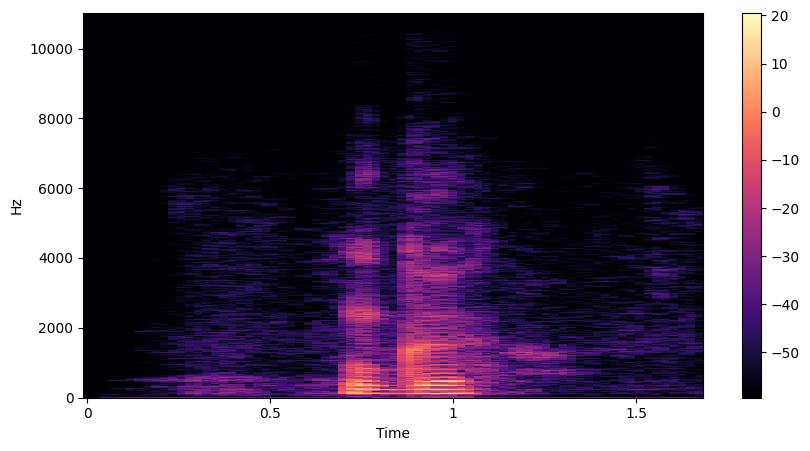

In [ ]:
import librosa
import matplotlib.pyplot as plt
audio = '/content/Tatar_wav/g.wav'
x, sr = librosa.load(audio)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

In [ ]:
!pip install pydub

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

In [ ]:
#Import the .wav audio
f = '/content/Tatar_wav/d.wav'
#s = sampling (int)
#a = audio signal (numpy array)
s,a = wavfile.read(f)
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))

Sampling Rate: 44100
Audio Shape: (75776,)


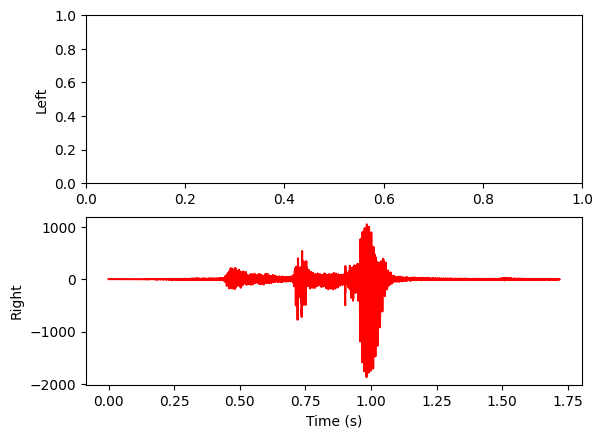

In [ ]:
#number of samples
na = a.shape[0]
#audio time duration
la = na / s

#plot signal versus time
t = np.linspace(0,la,na)
plt.subplot(2,1,1)
# plt.plot(t,a[:,0],'b-')
plt.ylabel('Left')
plt.subplot(2,1,2)
plt.plot(t,a,'r-')
plt.ylabel('Right')
plt.xlabel('Time (s)')
plt.show()

In [ ]:
sound = AudioSegment.from_wav(f)
sound = sound.set_channels(1)
fm = f[:-4]+'_mono.wav'
sound.export(fm,format="wav")


<_io.BufferedRandom name='/content/Tatar_wav/d_mono.wav'>

In [ ]:
s,a = wavfile.read(fm)
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))


Sampling Rate: 44100
Audio Shape: (75776,)


<ipython-input-89-f129bcdecba2>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


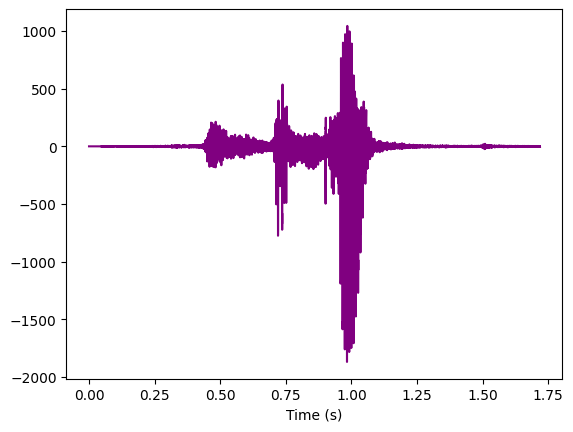

In [ ]:
na = a.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

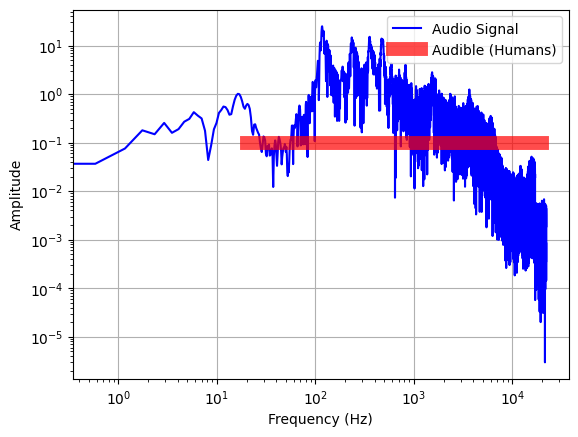

In [ ]:
#analyze entire audio clip
na = len(a)
a_k = np.fft.fft(a)[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

#plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,'b-',label='Audio Signal')
plt.plot([20,20000],[0.1,0.1],'r-',alpha=0.7,\
         linewidth=10,label='Audible (Humans)')
ax.set_xscale('log'); ax.set_yscale('log')
plt.grid(); plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()


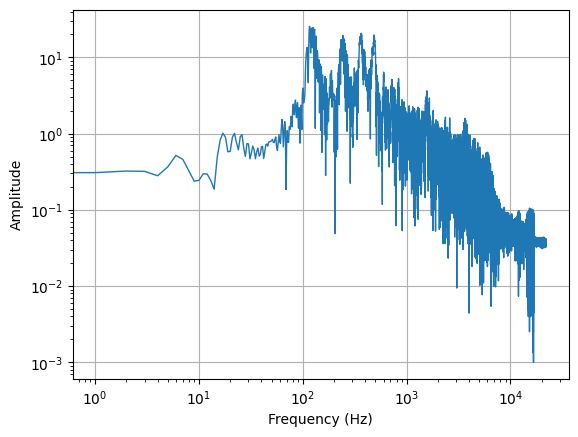

In [ ]:
#first second clip
na = s
a_k = np.fft.fft(a[:na])[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

#plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=1)
ax.set_xscale('log'); ax.set_yscale('log')
plt.ylabel('Amplitude'); plt.grid()
plt.xlabel('Frequency (Hz)')
plt.show()

<ipython-input-92-f388159e7768>:2: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


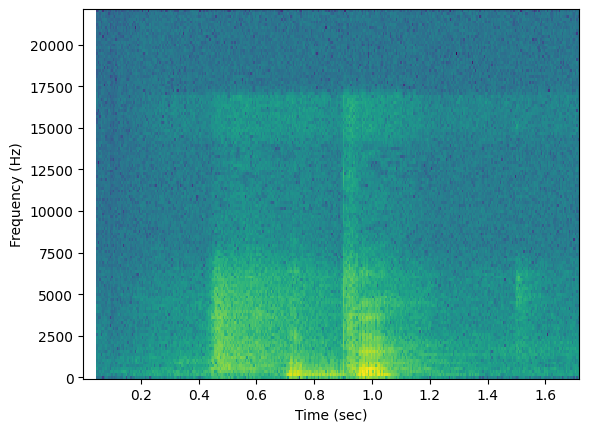

In [ ]:
fr, tm, spgram = signal.spectrogram(a,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()


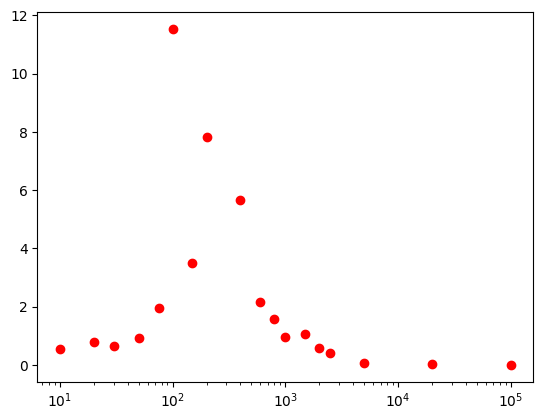

In [ ]:
#bin the frequencies for machine learning features
fb = np.array([0,10,20,30,50,75,100,150,200,400,600,\
               800,1000,1500,2000,2500,5000,20000,100000])
Pb = np.zeros(len(fb))
nb = np.zeros(len(fb))
ibin = 0
n = 0
for i in range(len(f)):
    if f[i]>fb[ibin+1]:
        ibin+=1
    nb[ibin]+=1
    Pb[ibin]+=Pxx[i]
for i in range(len(fb)):
    if nb[i] == 0:
        nb[i]=1
    Pb[i] = Pb[i]/nb[i]
fig,ax = plt.subplots()
plt.semilogx(fb,Pb,'ro',linewidth=1)

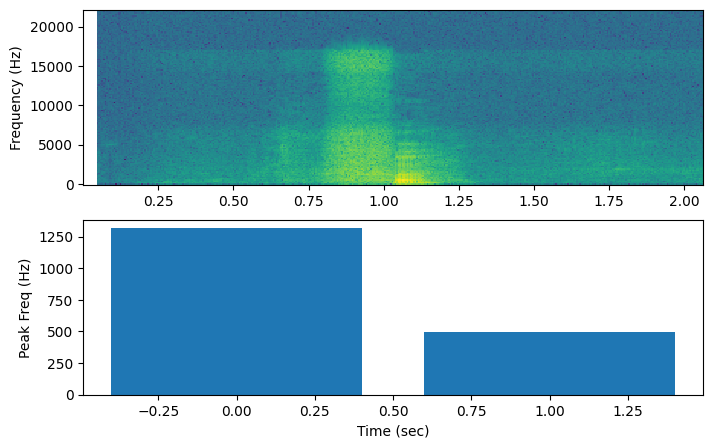

In [ ]:
#analyze each sec of audio clip
nsec = int(np.floor(la))
pf = np.empty(nsec)
for i in range(nsec):
    audio = a[i*s:(i+1)*s]; na=len(audio) # use 48000 points with 48kHz
    a_k = np.fft.fft(audio)[0:int(na/2)]/na
    a_k[1:] = 2*a_k[1:]
    Pxx = np.abs(a_k)
    f = s*np.arange((na/2))/na
    ipf = np.argmax(Pxx)
    pf[i] = f[ipf]

plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,1,2)
tb = np.arange(0,nsec)
plt.bar(tb,pf)
plt.xlabel('Time (sec)'); plt.ylabel('Peak Freq (Hz)')
plt.show()

In [ ]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
audio_file = 'ggg.wav'
y, sr = librosa.load(audio_file)


In [ ]:
mfccs = librosa.feature.mfcc(y = y, sr=sr, n_mfcc=13)

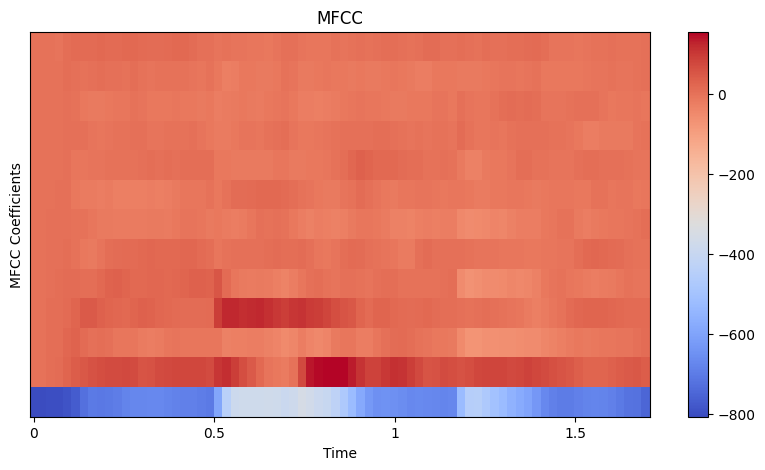

In [ ]:

plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

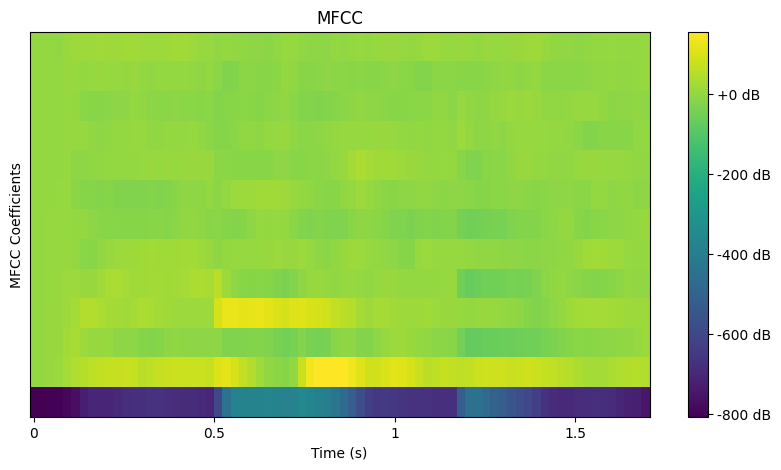

In [ ]:


plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, x_axis='time', cmap='viridis', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

In [ ]:
y, sr = librosa.load(audio_file)  # Load audio and limit to 3 seconds
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
# Transpose the spectrogram to have the shape (timesteps, n_mels)
spectrogram = spectrogram.T
# audio_data.append(spectrogram)
# target_labels.append(label)

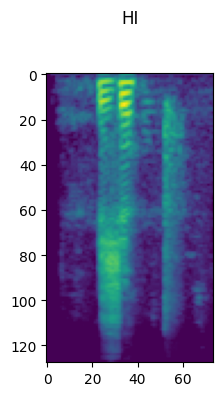

In [ ]:
# Define a function to plot spectrograms for a class

plt.figure(figsize=(7, 4))
plt.suptitle("HI")
y, sr = librosa.load(audio_file, duration=3)
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

plt.imshow(spectrogram)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [ ]:
import zipfile
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:

y, sr = librosa.load('/content/Tatar_wav/b.wav', duration=3)  # Load audio and limit to 3 seconds
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
# Transpose the spectrogram to have the shape (timesteps, n_mels)
spectrogram = spectrogram.T
audio_data.append(spectrogram)
target_labels.append(label)